# **Combining Different Models for Ensemble Learning**

**Outline**

- Learning with ensembles

- Combining classifiers via majority vote
    - Implementing a simple majority vote classifier
    - Using the majority voting principle to make predictions
    - Evaluating and tuning the ensemble classifier

- Bagging – building an ensemble of classifiers from bootstrap samples
    - Bagging in a nutshell
    - Applying bagging to classify samples in the Wine dataset

- Leveraging weak learners via adaptive boosting
    - How boosting works
    - Applying AdaBoost using scikit-learn

- Gradient boosting -- training an ensemble based on loss gradients
    - Comparing AdaBoost with gradient boosting
    - Outlining the general gradient boosting algorithm
    - Explaining the gradient boosting algorithm for classification
    - Illustrating gradient boosting for classification
    - Using XGBoost

In [1]:
from IPython.display import Image
%matplotlib inline

## **Learning with ensembles**

**Ensemble Learning**


### **1. Definition**

Ensemble learning combines multiple individual models (often called *base learners* or *weak learners*) to form a more robust and accurate *meta-model* (or *strong learner*). The key idea is that while individual models may make errors, combining them reduces variance, bias, or both.


### **2. Types of Ensemble Methods**

| **Type**                              | **Technique**                                                                      | **Goal**                  | **Example Algorithms**                                   |
| ------------------------------------- | ---------------------------------------------------------------------------------- | ------------------------- | -------------------------------------------------------- |
| **Bagging (Bootstrap Aggregating)**   | Train models on different random subsets of data (with replacement).               | Reduce variance.          | Random Forest                                            |
| **Boosting**                          | Train models sequentially, where each model focuses on correcting previous errors. | Reduce bias and variance. | AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost |
| **Stacking (Stacked Generalization)** | Combine predictions from multiple models using another model (meta-learner).       | Improve generalization.   | Stacked Ensembles, Blending                              |
| **Voting**                            | Combine predictions via majority (classification) or average (regression).         | Improve overall accuracy. | Hard/Soft Voting Classifier                              |



### **3. Mathematical Foundation**

#### **Bagging**

Given $M$ models $h_1, h_2, ..., h_M$ trained on bootstrap samples:

* **Prediction (regression):**
  $`\hat{y} = \frac{1}{M} \sum_{m=1}^M h_m(x)`$

* **Prediction (classification):**
  $`\hat{y} = \mathrm{mode}\{h_1(x), h_2(x), ..., h_M(x)\}`$

This reduces model variance since each $h_m$ sees different data subsets.



#### **Boosting**

Sequentially trains weak learners $h_m(x)$ with weights $\alpha_m$, updating sample weights to focus on misclassified points.

$$F(x) = \sum_{m=1}^M \alpha_m h_m(x)$$

Each new model improves on the errors of the previous one.



#### **Stacking**

Trains several base models and uses their predictions as input features for a *meta-learner*:

$$\hat{y} = g(h_1(x), h_2(x), ..., h_M(x))$$

where $g$ is the meta-model (e.g., Logistic Regression).



### **4. Bias–Variance Trade-off**

| **Method** | **Effect on Bias** | **Effect on Variance** |
| ---------- | ------------------ | ---------------------- |
| Bagging    | No major change    | ↓ Reduces variance     |
| Boosting   | ↓ Reduces bias     | Slightly ↑ variance    |
| Stacking   | ↓ Reduces bias     | Balanced               |



### **5. Use Cases**

* **Bagging (Random Forest):** Best when model overfits (high variance).
* **Boosting (XGBoost, LightGBM):** Best for structured/tabular data with complex patterns.
* **Stacking:** Best when diverse models capture complementary relationships.
* **Voting:** When combining models with similar performance levels.



### **6. Advantages**

* Improved predictive performance.
* Robustness to noise and overfitting.
* Generalization across diverse models.

### **7. Disadvantages**

* Increased computational cost.
* Harder interpretability.
* Possible redundancy among models.



### **8. Summary Table**

| **Method** | **Base Models** | **Combination Rule** | **Key Strength**     |
| ---------- | --------------- | -------------------- | -------------------- |
| Bagging    | Independent     | Averaging/Voting     | Variance reduction   |
| Boosting   | Sequential      | Weighted sum         | Bias reduction       |
| Stacking   | Heterogeneous   | Meta-model           | Generalization power |
| Voting     | Any             | Majority/Average     | Simplicity           |


![The different voting concepts](./figures/different-voting-concepts.png)

- Using the training dataset, we start by training `m` different classifier $(C_{1}, ..., C_{m})$. Depending on the technique, the ensemble can be built from different classification algorithms, for example, decision trees, support vector machines, logistic regression classifiers, and so on.

- Alternatively, we can also use the same base classification algorithm, fitting different subsets of the training dataset. One prominent example of this approach is the random forest algorithm combining different decision tree classifiers.

![Ensemble Approach](./figures/ensemble-approach.png)

- Probability Mass function in Python:

In [3]:
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1 - error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)

ensemble_error(n_classifier=11, error=0.25)

np.float64(0.03432750701904297)

- After we have implemented the `ensemble_error` function, we can compute the ensemble error rates for a range of different base errors from `0.0 to 1.0` to visualize the relationship between ensemble and base errors in a line graph:

In [4]:
import numpy as np

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
              for error in error_range]

In [16]:
ens_errors

[np.float64(0.0),
 np.float64(4.4254343383479994e-10),
 np.float64(2.71207411810304e-08),
 np.float64(2.957089768150355e-07),
 np.float64(1.5898640480468992e-06),
 np.float64(5.801345058593751e-06),
 np.float64(1.656411575903354e-05),
 np.float64(3.992476631525723e-05),
 np.float64(8.500149873708894e-05),
 np.float64(0.00016459292554947568),
 np.float64(0.0002957060800000002),
 np.float64(0.0004999803724290905),
 np.float64(0.0008039907946370431),
 np.float64(0.001239419514412758),
 np.float64(0.0018430901570849726),
 np.float64(0.0026568635802539054),
 np.float64(0.0037273978509897755),
 np.float64(0.0051057784699690125),
 np.float64(0.0068470276914775734),
 np.float64(0.009009504098156072),
 np.float64(0.011654205440000008),
 np.float64(0.014843989172661222),
 np.float64(0.018642726163718218),
 np.float64(0.023114403709482208),
 np.float64(0.02832219435026633),
 np.float64(0.03432750701904297),
 np.float64(0.04118903683622163),
 np.float64(0.0489618294000612),
 np.float64(0.057696374

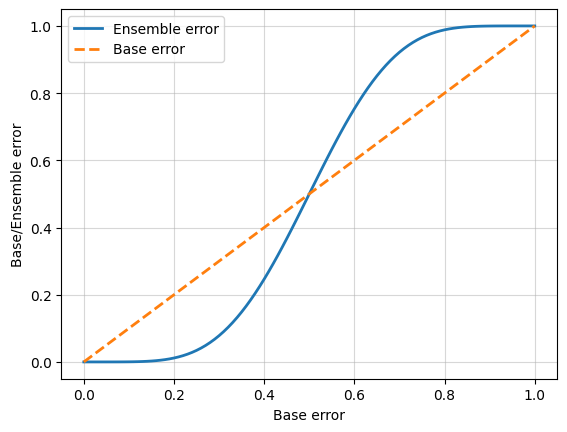

In [17]:
import matplotlib.pyplot as plt


plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
#plt.savefig('figures/07_03.png', dpi=300)
plt.show()

- As you can see in the preceeding plot, the error probability of an ensemble is always better than the error of an individual base classifier, as long as the base classifiers perform better than random guessing $(\epsilon \lt 0.5)$

## **Combining classifiers via majority vote**

Let's start with a warm-up exercise and implement a simple ensemble classifier for majority voting in Python.


### **Implementing a simple majority vote classifier**

The algorithm that we are going to implement in this section will allow us to combine different classification algorithms associated with individual weights for confidence. Our goal is to build a stronger meta-classifier that balances out the individual classifiers’ weaknesses on a particular dataset.

In [18]:
import numpy as np

np.argmax(np.bincount([0, 0, 1], 
                      weights=[0.2, 0.2, 0.6]))

np.int64(1)

- `bincount` function counts the number of occurrences of each label.
- `argmax` function returns the index position of the highest count, corresponding to the majority class label.

- To implement the weighted majority vote based on class probabilities, we can again make use of `NumPy`, using `np.average` and `np.argmax`:

In [19]:
ex = np.array([[0.9, 0.1],
               [0.8, 0.2],
               [0.4, 0.6]])

p = np.average(ex, 
               axis=0, 
               weights=[0.2, 0.2, 0.6])
p

array([0.58, 0.42])

In [21]:
print(np.argmax(p))

0


- Putting everything together, let’s now implement `MajorityVoteClassifier` in Python:

In [22]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator



# Scikit-learn 0.16 and newer requires reversing the parent classes
import sklearn
base_classes = (ClassifierMixin, BaseEstimator) if sklearn.__version__ >= "0.16" else (BaseEstimator, ClassifierMixin)

# class MajorityVoteClassifier(BaseEstimator, 
#                             ClassifierMixin):

class MajorityVoteClassifier(*base_classes):

    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote must be 'probability' or 'classlabel'"
                             f"; got (vote={self.vote})")

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f'Number of classifiers and weights must be equal'
                             f'; got {len(self.weights)} weights,'
                             f' {len(self.classifiers)} classifiers')

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out

- We used the `BaseEstimator` and `ClassifierMixin` parent classes to get some base functionality for free, including the `get_params` and `set_params` methods to set and return the classifier's parameters, as well as the score method to calculate the prediction accuracy.

- Next, we added the `predict` method to predict the class label via a majority vote based on the class labels if we initialize a new `MajorityVoteClassifier` object with `vote='classlabel'`. Alternatively, we will be able to initialize the ensemble classifier with `vote='probability'` to predict the class label based on the class membership probabilities. 

- Futhermore, we added a `predict_proba` method to return the averaged probabilities, which is useful when computing the `receiver operating characteristic area under the curve (ROC AUC)`.

- We defined our own modified version of the `get_params` method to use the `_name_estimators` function to access the parameters of individual classifiers in the ensemble; this may look a little bit complicated at first, but it will make perfect sense when we use grid search for hyperparameter tuning later.

### **Using the majority voting principle to make predictions**

- Load the `Iris dataset` from scikit-learn's datasets module.
- Select two features, `sepal width` and `petal length`, to make the classification task more challenging for illustration purposes.
- Although our `MajorityVoteClassifier` generalizes to multiclass problems, we will only classify flower examples from the `Iris-versicolor` and `Iris-virginica` classes, with which we will compute the `ROC AUC` later.

- The code is as follows:

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

# split the Iris example into 50 percent training and 50 percent test data
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.5,
                     random_state=1,
                     stratify=y)

In [26]:
X_train.shape, y_train.shape

((50, 2), (50,))

Using the training dataset, we now will train three different classifiers:

- Logistic regression classifier
- Decision tree classifier
- k-nearest neighbors classifier

We will then evaluate the model performance of each classifier via `10-fold cross validation` on the training dataset before we combine them into an ensemble classifier:

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', C=1e-3,
                          solver='lbfgs', random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1, p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


- If you notice, we trained the `Logistic regression` and `k-nearest neighbors` classifier as part of a pipeline. The reason behind it is that, both the logistic regression and k-nearest neighbors algorithms (using the Euclidena distance metric) are not scale-invariant, in contrast to decision trees. It is a good habit to work with standardized features.

- Moving to the more exciting part, let's combine the individual classifiers for majority rule voting in our `MajorityVoteClassifier`:

In [29]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority voting]


### **Evaluating and tuning the ensemble classifier**

- Here, we are going to compute the `ROC curves` from the test dataset to check that `MajorityVoteClassifier` generalizes well with unseen data.

- We must remember that the test dataset is not to be used for model selection; its purpose is merely to report an unbiased estimate of the generalization performance of a classifier system:

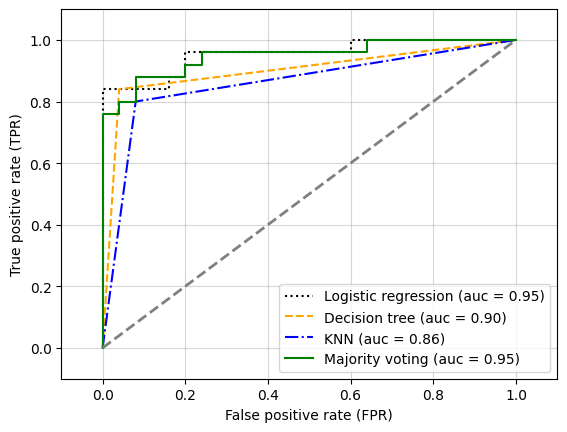

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label=f'{label} (auc = {roc_auc:.2f})')

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('figures/07_04', dpi=300)
plt.show()

- From the resulting `ROC`, the ensemble classifier also performs well on the test dataset `(ROC AUC = 0.95)`. However, you can see that the `logistic regression classifier` performs similarly well on the same dataset, which is probably due to the high variance (in this case, the sensitivity of how we split the dataset) given the small size of the dataset.

- Although it is not necessary to standardize the training features prior to model fitting, because our logistic regression and k-nearest neighbors pipelines will automatically take care of it, we will standardize the training dataset so that the decision regions of the decision tree will be on the same scale for visual purposes. The code is as follows:

In [31]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

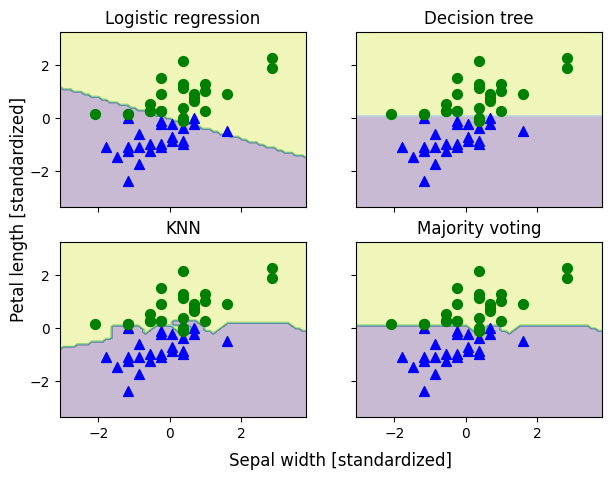

In [32]:
from itertools import product

all_clf = [pipe1, clf2, pipe3, mv_clf]

x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=2, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(7, 5))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], 
                                  X_train_std[y_train==0, 1], 
                                  c='blue', 
                                  marker='^',
                                  s=50)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], 
                                  X_train_std[y_train==1, 1], 
                                  c='green', 
                                  marker='o',
                                  s=50)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -5., 
         s='Sepal width [standardized]', 
         ha='center', va='center', fontsize=12)
plt.text(-12.5, 4.5, 
         s='Petal length [standardized]', 
         ha='center', va='center', 
         fontsize=12, rotation=90)

#plt.savefig('figures/07_05', dpi=300)
plt.show()

- Interestingly, but also as expected, the decision regions of the ensemble classifier seem to be a hybrid of the decision regions from the individual classifiers. 

- Let's call the `get_params` method to get a basic idea of how we can access the individual parameters inside a `GridSearchCV` object:

In [33]:
mv_clf.get_params()

{'pipeline-1': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 'decisiontreeclassifier': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 'pipeline-2': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', KNeighborsClassifier(n_neighbors=1)]]),
 'pipeline-1__memory': None,
 'pipeline-1__steps': [('sc', StandardScaler()),
  ['clf', LogisticRegression(C=0.001, random_state=1)]],
 'pipeline-1__transform_input': None,
 'pipeline-1__verbose': False,
 'pipeline-1__sc': StandardScaler(),
 'pipeline-1__clf': LogisticRegression(C=0.001, random_state=1),
 'pipeline-1__sc__copy': True,
 'pipeline-1__sc__with_mean': True,
 'pipeline-1__sc__with_std': True,
 'pipeline-1__clf__C': 0.001,
 'pipeline-1__clf__class_weight': None,
 'pipeline-1__clf__dual': False,
 'pipeline-1__clf__fit_intercept': True,
 'pipeline-1__clf__intercept_scaling': 1,
 'pipeline-1__clf__l1_ratio': None,
 'pipeline-1__clf

In [50]:
mv_clf.get_params()['pipeline-1__clf__penalty'], mv_clf.get_params()['pipeline-1__clf__C']

('l2', 0.001)

- Based on the values returned by the `get_params` method, we not know how to access the individual classifier's attributes. 

- Let's now tune the inverse regularization parameter, `C`, of the logistic regression classifier and the decision tree depth via a grid search for demonstration purposes:

In [51]:
from sklearn.model_selection import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    mean_score = grid.cv_results_['mean_test_score'][r]
    std_dev = grid.cv_results_['std_test_score'][r]
    params = grid.cv_results_['params'][r]
    print(f'{mean_score:.3f} +/- {std_dev:.2f} {params}')

0.983 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.10 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.983 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.10 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}


In [52]:
print(f'Best parameters: {grid.best_params_}')

Best parameters: {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}


In [53]:
print(f'ROC AUC : {grid.best_score_:.2f}')

ROC AUC : 0.98


In [54]:
grid.best_estimator_.classifiers

[Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', KNeighborsClassifier(n_neighbors=1)]])]

In [55]:
mv_clf = grid.best_estimator_

In [56]:
mv_clf.set_params(**grid.best_estimator_.get_params())

MajorityVoteClassifier(classifiers=[Pipeline(steps=[('sc', StandardScaler()),
                                                    ('clf',
                                                     LogisticRegression(C=0.001,
                                                                        random_state=1))]),
                                    DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=1,
                                                           random_state=0),
                                    Pipeline(steps=[('sc', StandardScaler()),
                                                    ('clf',
                                                     KNeighborsClassifier(n_neighbors=1))])])

In [57]:
mv_clf

MajorityVoteClassifier(classifiers=[Pipeline(steps=[('sc', StandardScaler()),
                                                    ('clf',
                                                     LogisticRegression(C=0.001,
                                                                        random_state=1))]),
                                    DecisionTreeClassifier(criterion='entropy',
                                                           max_depth=1,
                                                           random_state=0),
                                    Pipeline(steps=[('sc', StandardScaler()),
                                                    ('clf',
                                                     KNeighborsClassifier(n_neighbors=1))])])

- As you can see, we get the best cross-validation results when we choose a lower regularization strength `(C=0.001)`, whereas the tree depth does not seem to affect the performance at all, suggesting that a decision stump is sufficient to separate the data. To remind ourselves that it is a bad practice to use the test dataset more than once for model evaluation, we are not going to estimate the generalization performance of the tuned hyperparameters in this section. We will move on swiftly to an alternative
approach for ensemble learning: `bagging`.

---

## **Bagging -- Building an ensemble of classifiers from bootstrap samples**

`Bagging` is an ensemble learning technique that is closely related to the `MajorityVoteClassifier` that we implemented in the previous section. However, instead of using the same training dataset to fit the individual classifiers in the ensemble, we draw bootstrap samples (random samples with replacement) from the intital training dataset, which is why `bagging` is also known as `bootstrap aggregating`.

![The concept of Bagging](./figures/bagging.png)

### **Bagging in a nutshell**

To provide a more concrete example of how the `bootstrap aggregating` of a bagging classifier works, let's consider the figure below. Here, we have seven different training instances (denoted as indices `1-7`) that are sampled randomly with replacement in each round of bagging. Each `bootstrap` sample is then used to fit a classifier, $C_{j}$, which is most typically an unpruned decision tree:


![An example of bagging](./figures/example-bagging.png)


- As you can see in the figure, each classifier receives a random subset of examples from the training dataset. We denote these random samples obtained via bagging as `Bagging round 1`, `Bagging round 2`, and so on. 

- Each subset contains a certain portion of duplicates and some of the original examples don't appear in a resampled dataset at all due to sampling with replacement. 

- Once the individual classifiers are fit to the bootstrap samples, the predictions are combined using majority voting.

- Also note that bagging is related to the `random forest classifer`. In fact, random forest is a special case of bagging where we also use random feature subsets when fitting the individual decision trees.

### **Applying bagging to classify examples in the Wine dataset**

- To see bagging in action, let's create a more complex classification problem using the `Wine dataset`.

- Here, we will only consider the `Wine classes 2 and 3`, and we will select two features - Alcohol and OD280/OD315
of diluted wines:

In [61]:
import pandas as pd

df_wine = pd.read_csv("../data/wine/wine.data", header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
df_wine['Class label'].unique()

array([1, 2, 3])

In [64]:
# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [65]:
y.shape, X.shape

((119,), (119, 2))

- Next, we will encode the class labels into binary format and split the dataset into `80` percent training and `20` percent test datasets:

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=1,
                     stratify=y)

- A `BaggingClassifier` algorithm is already implemented in scikit-learn, which we can import from the `ensemble` submodule.

- Here, we will use an unpruned decision tree as the base classifier and create an ensemble of `500` decision trees on different `bootstrap` samples of the training dataset:

In [68]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        n_jobs=1,
                        random_state=1)

- Next, we will calculate the accuracy score of the prediction on the training and test datasets to compare the performance of the bagging classifier to the performance of a single unpruned decision tree:

In [70]:
from sklearn.metrics import accuracy_score


tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'Decision tree train/test accuracies '
      f'{tree_train:.3f}/{tree_test:.3f}')

Decision tree train/test accuracies 1.000/0.833


- Based on the accuracy values that we printed here, the unpruned decision tree predicts all the class labels of the training examples correctly; however, the substantially lower test accuracy indicates high variance `(overfitting)` of the model

In [71]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print(f'Bagging train/test accuracies '
      f'{bag_train:.3f}/{bag_test:.3f}')

Bagging train/test accuracies 1.000/0.917


- Although the training accuracies of the decision tree and bagging classifier are similar on the training dataset (both 100 percent), we can see that the bagging classifier has a slightly better generalization performance, as estimated on the test dataset.

- Next, let's compare the decision regions between the decision tree and the bagging classifier:

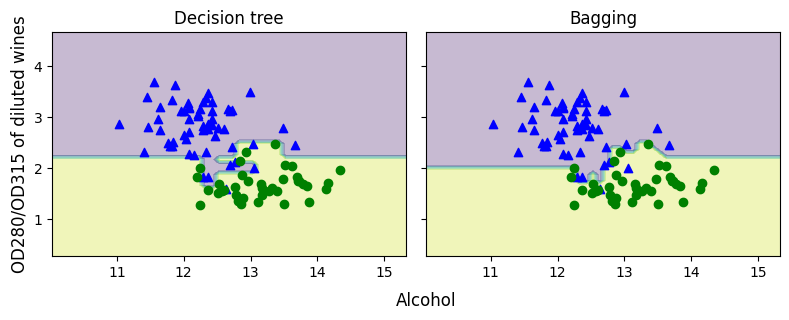

In [72]:
import numpy as np
import matplotlib.pyplot as plt


x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('OD280/OD315 of diluted wines', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='Alcohol',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

#plt.savefig('figures/07_08.png', dpi=300, bbox_inches='tight')
plt.show()

- As seen in the plot above, the piece-wise linear decision boundary of the three-node deep decision tree looks smoother in the bagging ensemble.

- We only looked at a very simple bagging example in this section. In practice, more complex classification tasks and a dataset’s high dimensionality can easily lead to overfitting in single decision trees, and this is where the bagging algorithm can really play to its strengths. 
  
- Finally, we must note that the bagging algorithm can be an effective approach to reducing the variance of a model. However,
bagging is ineffective in reducing model bias, that is, models that are too simple to capture the trends in the data well. This is why we want to perform bagging on an ensemble of classifiers with low bias, for example, unpruned decision trees.

---

## **Leveraging weak learners via adaptive boosting**

- In this section, we will discuss `boosting`, with a special focus on its most common implementation: `Adaptive Boosting (AdaBoost).`

- In boosting, the ensemble consists of very simple base classifiers, also often referred to as `weak learners`, which often only have a slight performance advantage over random guessing - a typical example of a weak learner is a decision tree stump. 

- The key concept behind `boosting` is to focus on training examples that are hard to classify, that is, to let the weak learners subsequently learn from misclassified training examples to improve the performance of the ensemble.

### **How adaptive boosting works**

In contrast to bagging, the initial formulation of the boosting algorithm uses random subsets of training examples drawn from the training dataset without replacement; the original boosting procedure can be summarized in the following four key steps:

1. Draw a random subset (sample) of training examples, $d_{1}$, without replacement from the training dataset, $D$, to train a weak learner, $C_{1}$.

2. Draw a second random training subset, $d_{2}$, without replacement from the training dataset and add `50` percent of the examples that were previously misclassified to train a weak learner, $C_{2}$.

3. Find the training examples, $d_{3}$, in the training dataset, $D$, which $C_{1}$ and $C_{2}$ disagree upon, to train a third weak learner, $C_{3}$.

4. Combine the weak learners $C_{1}$, $C_{2}$, and $C_{3}$ via majority voting.


Boosting can lead to a decrease in bias as well as variance compared to bagging models. In practice, however, boosting algorithms such as `AdaBoost` are also known for their high variance, that is, the tendency to overfit the training data.

In contrast to the original boosting procedure described here, `AdaBoost` uses the complete training dataset to train the weak learners, where the training examples are reweighted in each iteration to build a strong classifier that learns from the mistakes of the previous weak learners in the ensemble.


![Concept of AdaBoost to improve weak learners](./figures/basic-concept-adaboost.png)


- To walk through the `AdaBoost` illustration step by step, we will start with `subfigure 1`, which represents a training dataset for binary classification where all training examples are assigned equal weights. Based on this training dataset, we train a decision stump (shown as a dashed line) that tries to classify the examples of the two classes (triangles and circles), as well as possibly minimizing the loss function (or the impurity score in the special case of `decision tree ensembles`).


- For the next round `(subfigure 2)`, we assign a larger weight to the two previously misclassified examples (circles). Furthermore, we lower the weight of the correctly classified examples. The next decision stump will now be more focused on the training examples that have the largest weights—the training examples that are supposedly hard to classify.


- The weak learner shown in `subfigure 2` misclassifies three different examples from the circle class, which are then assigned a larger weight, as shown in `subfigure 3`.


- Assuming that our `AdaBoost ensemble` only consists of three rounds of boosting, we then combine the three weak learners trained on different reweighted training subsets by a weighted majority vote, as shown in `subfigure 4`.

Now that we have a better understanding of the basic concept of `AdaBoost`, let’s take a more detailed look at the algorithm using `pseudo code`. For clarity, we will denote element-wise multiplication by the `cross symbol (×)` and the dot-product between two vectors by a `dot symbol (⋅)`:

![Basic concept of AdaBoost](./figures/Adaboost-training.png)

In [77]:
y = np.array([1, 1, 1, -1, -1, -1,  1,  1,  1, -1])
yhat = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1])
correct = (y == yhat)
weights = np.full(10, 0.1)
print(weights)

epsilon = np.mean(~correct)
print(epsilon)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
0.3


In [78]:
alpha_j = 0.5 * np.log((1-epsilon) / epsilon)
print(alpha_j)

0.42364893019360184


In [79]:
update_if_correct = 0.1 * np.exp(-alpha_j * 1 * 1)
print(update_if_correct)

0.06546536707079771


In [80]:
update_if_wrong_1 = 0.1 * np.exp(-alpha_j * 1 * -1)
print(update_if_wrong_1)

0.1527525231651947


In [81]:
update_if_wrong_2 = 0.1 * np.exp(-alpha_j * -1 * 1)
print(update_if_wrong_2)

0.1527525231651947


In [82]:
weights = np.where(correct == 1, update_if_correct, update_if_wrong_1)
print(weights)

[0.06546537 0.06546537 0.06546537 0.06546537 0.06546537 0.06546537
 0.15275252 0.15275252 0.15275252 0.06546537]


In [84]:
normalized_weights = weights / np.sum(weights)
print(normalized_weights)

[0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.16666667 0.16666667 0.16666667 0.07142857]


### **Applying AdaBoost using scikit-learn**

The previous subsection introduced `AdaBoost` in a nutshell. Skipping to the more practical part, let’s now train an `AdaBoost ensemble classifier` via scikit-learn. We will use the same `Wine subset` that we used in the previous section to train the bagging meta-classifier.

- We will train the `AdaBoostClassifier` on 500 decision tree stumps:

In [86]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

In [87]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'Decision tree train/test accuracies '
      f'{tree_train:.3f}/{tree_test:.3f}')

Decision tree train/test accuracies 0.916/0.875


- Output above: The decision tree stump seems to underfit the training data in contrast to the unpruned decision tree that we saw in the previous section:

In [88]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print(f'AdaBoost train/test accuracies '
      f'{ada_train:.3f}/{ada_test:.3f}')

AdaBoost train/test accuracies 0.968/0.917


- Output above: Here, you can see that `AdaBoost` model predicts all class labels of the training dataset correctly and also shows a slightly improved test dataset performance compared to the decision tree stump.

- We also introduced additional variance with our attempt to reduce the model bias-a greater gap between training and test performance.

- Although we used another simple example for demonstration purposes, we can see that the performance of the AdaBoost classifier is slightly improved compared to the decision stump and achieved very similar accuracy scores as the bagging classifier that we trained in the previous section. 

- However, we must note that it is considered bad practice to select a model based on the repeated usage of the test dataset.

- Let's check what the decision regions look like:

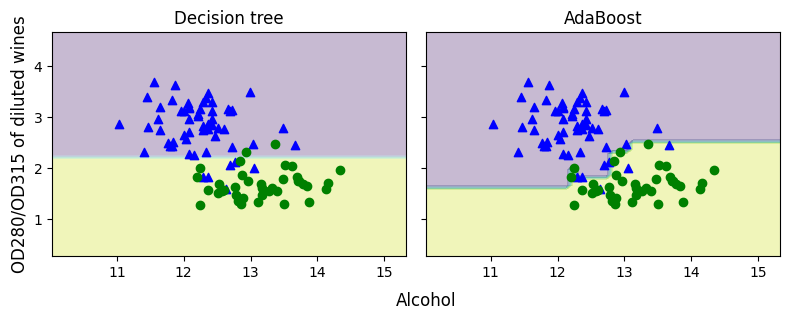

In [89]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('OD280/OD315 of diluted wines', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='Alcohol',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

# plt.savefig('figures/07_11.png', dpi=300, bbox_inches='tight')
plt.show()

- By looking at the decision regions, you can see that the decision boundary of the `AdaBoost` model is substantially more complex than the decision boundary of the decision stump. In addition, note that the `AdaBoost` model separates the feature space very similarly to the bagging classifier that we trained in the previous section.

- As concluding remarks about `ensemble techniques`, it is worth noting that `ensemble learning` increases the computational complexity compared to individual classifiers. In practice, we need to think carefully about whether we want to pay the price of increased computational costs for an often relatively modest improvement in predictive performance.

---

## **Gradient boosting -- training an ensemble based on loss gradients**

- `Gradient boosting` is another variant of the boosting concept introduced in the previous section, that is, successively training weak learners to create a strong ensemble. Gradient boosting is an extremely important topic because it forms the basis of popular machine learning algorithms such as `XGBoost`, which is well-known for winning Kaggle competitions.


- The `gradient boosting` algorithm may appear a bit daunting at first. So, in the following subsections, we will cover it step by step, starting with a general overview. Then, we will see how `gradient boosting` is used for classification and walk through an example. Finally, after we’ve introduced the fundamental concepts of gradient boosting, we will take a brief look at popular implementations, such as `XGBoost`, and we will see how we can use gradient boosting in practice.

### **Comparing AdaBoost with gradient boosting**

Fundamentally, `gradient boosting` is very similar to `AdaBoost`, which we discussed previously. `AdaBoost` trains decision tree stumps based on errors of the previous decision tree stump. In particular, the errors are used to compute sample weights in each round as well as for computing a classifier weight for each decision tree stump when combining the individual stumps into an ensemble. We stop training once a maximum number of iterations (decision tree stumps) is reached. Like `AdaBoost`,
`gradient boosting` fits decision trees in an iterative fashion using prediction errors. However, `gradient boosting` trees are usually deeper than decision tree stumps and have typically a maximum depth of `3` to `6` (or a maximum number of `8` to `64` leaf nodes). Also, in contrast to `AdaBoost`, `gradient boosting` does not use the prediction errors for assigning sample weights; they are used directly to form the target variable for fitting the next tree. Moreover, instead of having an individual weighting term for each tree, like in `AdaBoost`, `gradient boosting` uses a global learning rate that is the same for each tree.


As you can see, `AdaBoost` and `gradient boosting` share several similarities but differ in certain key aspects. In the following subsection, we will sketch the general outline of the gradient boosting algorithm.

---

### **Outlining the general gradient boosting algorithm**

![Gradient Boosting Algorithm](./figures/gradient-boosting-algo.png)



![Gradient Boosting Algorithm](./figures/gradient-boosting-algo-2.png)

---

### **Explaining the gradient boosting algorithm for classification**

![Gradient Boosting Algorithm for classification](./figures/gb-for-class-1.png)


![Gradient Boosting Algorithm for classification](./figures/gb-for-class-2.png)

---

### **Illustrating gradient boosting for classification**

![Illustrating gradient boosting for classification](./figures/gb1.png)


![Illustrating gradient boosting for classification](./figures/gb2.png)


![Illustrating gradient boosting for classification](./figures/gb3.png)

---

### **Using XGBoost**

After covering the nitty-gritty details behind gradient boosting, let’s finally look at how we can use gradient boosting code implementations.

- It is important to note that gradient boosting is a sequential process that can be slow to train. However, in recent years a more popular implementation of gradient boosting has emerged, namely, `XGBoost`.

- `XGBoost` proposed several tricks and approximations that speed up the training process substantially. Hence, the name `XGBoost`, which stands for extreme gradient boosting. Moreover, these approximations and tricks result in very good predictive performances. In fact, XGBoost gained popularity as it has been the winning solution for many Kaggle competitions.

- Next to XGBoost, there are also other popular implementations of gradient boosting, for example, `LightGBM` and `CatBoost`. Inspired by `LightGBM`, scikit-learn now also implements a `HistGradientBoostingClassifier`, which is more performant than the original gradient boosting classifier `(GradientBoostingClassifier)`.


You can find more details about these methods via the resources below:

- `XGBoost:` https://xgboost.readthedocs.io/en/stable/

- `LightGBM:` https://lightgbm.readthedocs.io/en/latest/

- `CatBoost:` https://catboost.ai

- `HistGradientBoostingClassifier:` https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

In [93]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=1000, 
                          learning_rate=0.01, 
                          max_depth=4, 
                          random_state=1,
                          )

gbm = model.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

gbm_train = accuracy_score(y_train, y_train_pred) 
gbm_test = accuracy_score(y_test, y_test_pred) 
print(f'XGboost train/test accuracies '
      f'{gbm_train:.3f}/{gbm_test:.3f}')

XGboost train/test accuracies 0.968/0.917


- Here, we fit the gradient boosting classifier with 1,000 trees (rounds) and a learning rate of 0.01. Typically, a learning rate between 0.01 and 0.1 is recommended. However, remember that the learning rate is used for scaling the predictions from the individual rounds. So, intuitively, the lower the learning rate, the more estimators are required to achieve accurate predictions.


- Next, we have the `max_depth` for the individual decision trees, which we set to 4. Since we are still boosting weak learners, a value between 2 and 6 is reasonable, but larger values may also work well depending on the dataset.


- However, interested readers can find more details in the original documentation at https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier.

### **Summary**

In this chapter, we looked at some of the most popular and widely used techniques for ensemble learning. Ensemble methods combine different classification models to cancel out their individual weaknesses, which often results in stable and well-performing models that are very attractive for industrial applications as well as machine learning competitions.

At the beginning of this chapter, we implemented `MajorityVoteClassifier` in Python, which allows us to combine different algorithms for classification. We then looked at bagging, a useful technique for reducing the variance of a model by drawing random bootstrap samples from the training dataset and combining the individually trained classifiers via majority vote. Lastly, we learned about `boosting` in the form of `AdaBoost` and `gradient boosting`, which are algorithms based on training weak learners that subsequently learn from mistakes.